## Introduction
Researchers have noted the similarites between the human SARS Corona virus COVID-19, and suspect its origin from the bat version of this virus. This mutation and how it spreads to humans may be better understood by building some visual and analytical tools, with data from the National Center for Biotechnology Information (NCBI) let's get started!

## Exploratory Analysis
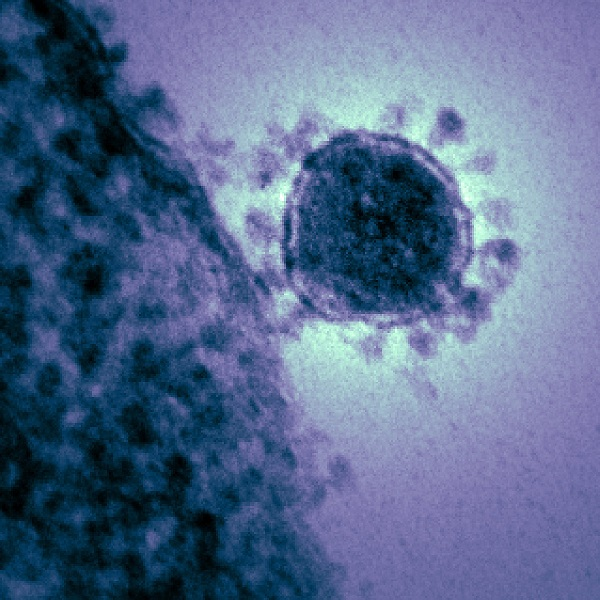

Mutations of this COVID-19 is evidently shown how it's related or matched (hit), for example in the file:
> MN997409.1_4NY0T82X016-Alignment.xml

For the bat version (COVID-19 virus like) genome, the taxonomy ID is typically like KY417146.1 prefixed by the "KY".

for example: ( a tiny snippet )
RNA nucleotide sequence for the bat virus:
> AAAATCAAAGCTTGTGTTGAAGAAGTTACAACAACTCTGGAAGAAACTAAGTTCCTCACAGAA

alignment with human COVID-19 :
> AAAATTAAGGCTTGCATTGATGAGGTTACCACAACACTGGAAGAAACTAAGTTTCTTACCAATA

Although this RNA nucleotide sequence of the bat version of COVID-19 is not an exact match with the human benchmark counterpart, taxonomy ID: MN997409.1, the hit percentage ranges approximately 82%.


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
'''
#work in progress...

import xml.sax

xml_path = '/kaggle/input/MN997409.1_4NY0T82X016-Alignment.xml'
   

class xHandler( xml.sax.ContentHandler ):
    def __init__(self):
        self.CurrentData = ""

   # Call when an element starts
    def startElement(self, tag, attributes):
        self.CurrentData = tag
        if(tag == "BlastOutput"):
            print("Blast")
         
   # Call when an elements ends
    def endElement(self, tag):
        if self.CurrentData == "BlastOuput_param":
            print("Params:", self.type)
        elif self.CurrentData == "Parameters":
            print("Params_expect:", self.parameters)
        elif self.CurrentData == "Parameter_expect":
            print("Year:", self.Parameters_xpect)

   # Call when a character is read
    def iterations(self, content):
        if self.CurrentData == "Iterations":
            self.type = content
        elif self.CurrentData == "Iteration_hits":
            self.format = content
        elif self.CurrentData == "Hit":
            self.year = content
        elif self.CurrentData == "Hit_accession":
            self.rating = content
    
    if ( __name__ == "__main__"):
     # create an XMLReader
        parser = xml.sax.make_parser()
       # turn off namepsaces
        parser.setFeature(xml.sax.handler.feature_namespaces, 0)

    # override the default ContextHandler
        Handler = xHandler()
        parser.setContentHandler( Handler )
        parser.parse(xml_path)
   '''

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/MN997409.1-4NY0T82X016-Alignment-HitTable.csv

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# MN997409.1-4NY0T82X016-Alignment-HitTable.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/kaggle/input/MN997409.1-4NY0T82X016-Alignment-HitTable.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'MN997409.1-4NY0T82X016-Alignment-HitTable.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

Let's take a quick look at what the data looks like:

In [ ]:
df1.columns = ['query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score']
df1.head(5)

Distribution graphs (histogram/bar graph) of sampled columns:

In [ ]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

In [ ]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

In [ ]:
plotScatterMatrix(df1, 20, 10)

### Let's check 2nd file: /kaggle/input/SARS_CORONAVIRUS_287BP_MN975263.1_accession_nucleotide.csv

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# SARS_CORONAVIRUS_287BP_MN975263.1_accession_nucleotide.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/kaggle/input/SARS_CORONAVIRUS_287BP_MN975263.1_accession_nucleotide.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'SARS_CORONAVIRUS_287BP_MN975263.1_accession_nucleotide.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

Let's take a quick look at what the data looks like:

In [ ]:
df2.head(5)

Distribution graphs (histogram/bar graph) of sampled columns:

In [ ]:
plotPerColumnDistribution(df2, 10, 5)

### Let's check 3rd file: /kaggle/input/SARS_CORONAVIRUS_287BP_MN975263.1_accession_protein.csv

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# SARS_CORONAVIRUS_287BP_MN975263.1_accession_protein.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('/kaggle/input/SARS_CORONAVIRUS_287BP_MN975263.1_accession_protein.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'SARS_CORONAVIRUS_287BP_MN975263.1_accession_protein.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

Let's take a quick look at what the data looks like:

In [ ]:
df3.head(5)

Distribution graphs (histogram/bar graph) of sampled columns:

In [ ]:
plotPerColumnDistribution(df3, 10, 5)

## Conclusion
Since this is just starter code with more visuals on the way, we'll kick the "conclusion" down the road for now.